In [1]:
pip install Faker

Note: you may need to restart the kernel to use updated packages.


In [2]:
from faker import Faker
import pandas as pd
import random
from io import StringIO

# Initialize Faker
Faker.seed(0)
fake = Faker()

# Function to create fake news articles
def generate_article():
    person = fake.name()
    organization = fake.company()
    location = fake.city()
    date = fake.date()
    headline = f"{person} speaks at {organization} event in {location}"
    content = (
        f"On {date}, {person} gave a speech at {organization}'s annual gathering in {location}. "
        f"The event, which attracted numerous industry leaders, focused on innovative trends."
    )
    return headline, content, person, organization, location, date

# Generate dataset with 10,000 rows
data = [generate_article() for _ in range(10000)]

# Create DataFrame
df = pd.DataFrame(data, columns=["Headline", "Content", "Person", "Organization", "Location", "Date"])

# Save DataFrame to CSV
df.to_csv('Articles.csv', index=False)

print("NER dataset saved to 'Articles.csv'")
print(df.head())

NER dataset saved to 'Articles.csv'
                                            Headline  \
0  Norma Fisher speaks at Sheppard-Tucker event i...   
1  Kathy Campbell speaks at Montgomery LLC event ...   
2  Erin Castro speaks at Hamilton-Carr event in N...   
3  Robert Dunn speaks at Davis Group event in New...   
4  Seth Lee speaks at Walker, Pratt and Thomas ev...   

                                             Content          Person  \
0  On 2002-03-11, Norma Fisher gave a speech at S...    Norma Fisher   
1  On 1974-01-26, Kathy Campbell gave a speech at...  Kathy Campbell   
2  On 2017-09-30, Erin Castro gave a speech at Ha...     Erin Castro   
3  On 1983-06-17, Robert Dunn gave a speech at Da...     Robert Dunn   
4  On 2018-04-15, Seth Lee gave a speech at Walke...        Seth Lee   

               Organization          Location        Date  
0           Sheppard-Tucker         Tammystad  2002-03-11  
1            Montgomery LLC        West Corey  1974-01-26  
2             

In [4]:
import pandas as pd
# Load dataset (replace with actual file path)
df = pd.read_csv("Articles.csv") 
# Display first few rows print(df.head())
# Assuming 'article_text' is the column with news content 
print(df.head(10)) 
# Print first article

                                            Headline  \
0  Norma Fisher speaks at Sheppard-Tucker event i...   
1  Kathy Campbell speaks at Montgomery LLC event ...   
2  Erin Castro speaks at Hamilton-Carr event in N...   
3  Robert Dunn speaks at Davis Group event in New...   
4  Seth Lee speaks at Walker, Pratt and Thomas ev...   
5  Mrs. Elizabeth Carter MD speaks at Olsen-Ferna...   
6  Clinton Underwood speaks at Salazar Ltd event ...   
7  Chase Johnson speaks at Villanueva PLC event i...   
8  Sarah Jacobson speaks at Bryan, Barnes and Hil...   
9  Katelyn Mccoy speaks at Sanchez Ltd event in D...   

                                             Content  \
0  On 2002-03-11, Norma Fisher gave a speech at S...   
1  On 1974-01-26, Kathy Campbell gave a speech at...   
2  On 2017-09-30, Erin Castro gave a speech at Ha...   
3  On 1983-06-17, Robert Dunn gave a speech at Da...   
4  On 2018-04-15, Seth Lee gave a speech at Walke...   
5  On 1987-06-30, Mrs. Elizabeth Carter MD gave

In [5]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [7]:
print(df.columns)


Index(['Headline', 'Content', 'Person', 'Organization', 'Location', 'Date'], dtype='object')


In [8]:
df.columns = df.columns.str.strip()


In [9]:
print(df.head())


                                            Headline  \
0  Norma Fisher speaks at Sheppard-Tucker event i...   
1  Kathy Campbell speaks at Montgomery LLC event ...   
2  Erin Castro speaks at Hamilton-Carr event in N...   
3  Robert Dunn speaks at Davis Group event in New...   
4  Seth Lee speaks at Walker, Pratt and Thomas ev...   

                                             Content          Person  \
0  On 2002-03-11, Norma Fisher gave a speech at S...    Norma Fisher   
1  On 1974-01-26, Kathy Campbell gave a speech at...  Kathy Campbell   
2  On 2017-09-30, Erin Castro gave a speech at Ha...     Erin Castro   
3  On 1983-06-17, Robert Dunn gave a speech at Da...     Robert Dunn   
4  On 2018-04-15, Seth Lee gave a speech at Walke...        Seth Lee   

               Organization          Location        Date  
0           Sheppard-Tucker         Tammystad  2002-03-11  
1            Montgomery LLC        West Corey  1974-01-26  
2             Hamilton-Carr        New Thomas  201

In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv("Articles.csv")

# Verify it's loaded
print(df.head())  # Should print some rows
print(df.columns)  # Should print column names

# Rename columns (after verifying df exists)
df.rename(columns=lambda x: x.lower(), inplace=True)


                  entities persons locations organizations ordinals
0  ['apple', 'steve jobs']      []        []            []       []
1        ['1947', 'India']      []        []            []       []
2   ['44th', 'california']      []        []            []       []
Index(['entities', 'persons', 'locations', 'organizations', 'ordinals'], dtype='object')


In [7]:
print("Is df defined?", 'df' in locals())


Is df defined? True


In [8]:
df.rename(columns=lambda x: x.lower(), inplace=True)


In [9]:
df = pd.read_csv("Articles.csv") 

In [11]:
print(df.columns.tolist())


['entities', 'persons', 'locations', 'organizations', 'ordinals']


In [12]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())  # Check again


['entities', 'persons', 'locations', 'organizations', 'ordinals']


In [13]:
print(df.head())  # Show first few rows
print(df.shape)   # Show number of rows and columns


                  entities persons locations organizations ordinals
0  ['apple', 'steve jobs']      []        []            []       []
1        ['1947', 'India']      []        []            []       []
2   ['44th', 'california']      []        []            []       []
(3, 5)


In [14]:
df.columns = df.columns.str.lower()  # Convert to lowercase
print(df.columns.tolist())  # Check again


['entities', 'persons', 'locations', 'organizations', 'ordinals']


In [16]:
if 'article_text' in df.columns:
    df['entities'] = df['article_text'].apply(extract_entities)
else:
    print("Column 'article_text' not found in DataFrame!")


Column 'article_text' not found in DataFrame!


In [59]:
import spacy
import pandas as pd

# Load spaCy's pre-trained NER model
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Sample DataFrame
data = {
    'article_text': [
        "Apple is a technology company founded in California.",
        "Barack Obama was born in Hawaii and was the 44th president of the United States.",
        "India is would be developed by 2027 under Modi ruling."
       
                                            
"On 2002-3-11, Norma Fisher gave a speech at Russia"   
  "On 1974-1-26, Kathy Campbell gave a speech at Japan"  
  "on 2017-9-30, Erin Castro gave a speech at Uk"    
  "On 1983-6-17, Robert Dunn gave a speech at Denmark"     
       
    ]
}

df = pd.DataFrame(data)

# Apply NER to each article
df['entities'] = df['article_text'].apply(extract_entities)

# Display extracted entities
print(df[['article_text', 'entities']].head())

                                        article_text  \
0  Apple is a technology company founded in Calif...   
1  Barack Obama was born in Hawaii and was the 44...   
2  India is would be developed by 2027 under Modi...   

                                            entities  
0                  [(Apple, ORG), (California, GPE)]  
1  [(Barack Obama, PERSON), (Hawaii, GPE), (44th,...  
2  [(India, GPE), (2027, DATE), (2002-3-11, DATE)...  


In [60]:
from collections import Counter

# Flatten the list of entities
all_entities = [ent for sublist in df['entities'] for ent in sublist]

# Count occurrences of each entity
entity_counts = Counter(all_entities)

# Convert to DataFrame
entity_df = pd.DataFrame(entity_counts.items(), columns=["Entity", "Count"]) \
    .sort_values(by="Count", ascending=False)

# Display most common entities
print(entity_df.head(10))

                       Entity  Count
0                (Apple, ORG)      1
9      (Norma Fisher, PERSON)      1
15      (Robert Dunn, PERSON)      1
14          (1983-6-17, DATE)      1
13      (Erin Castro, PERSON)      1
12   (Japanon 2017-9-30, FAC)      1
11   (Kathy Campbell, PERSON)      1
10  (RussiaOn 1974-1-26, ORG)      1
8           (2002-3-11, DATE)      1
1           (California, GPE)      1


In [21]:
top_entities = df['entities'].explode().value_counts().reset_index()
top_entities.columns = ['Entity', 'Count']


In [35]:
top_entities = top_entities.reset_index()


In [56]:
y=top_entities['Entity'],  
x=top_entities['Count']


In [57]:
print(top_entities.columns)


Index(['Entity', 'Count'], dtype='object')


In [61]:
print(df['entities'].explode().value_counts())


entities
(Apple, ORG)                 1
(Norma Fisher, PERSON)       1
(Robert Dunn, PERSON)        1
(1983-6-17, DATE)            1
(Erin Castro, PERSON)        1
(Japanon 2017-9-30, FAC)     1
(Kathy Campbell, PERSON)     1
(RussiaOn 1974-1-26, ORG)    1
(2002-3-11, DATE)            1
(California, GPE)            1
(2027, DATE)                 1
(India, GPE)                 1
(the United States, GPE)     1
(44th, ORDINAL)              1
(Hawaii, GPE)                1
(Barack Obama, PERSON)       1
(Denmark, GPE)               1
Name: count, dtype: int64


In [64]:
print(top_entities.head())  # Check if it has the expected columns
print(top_entities.index)   # Check if it has a MultiIndex
print(top_entities.columns) # Check column names


                       Entity  Count
0            ('Apple', 'ORG')      1
1       ('California', 'GPE')      1
2  ('Barack Obama', 'PERSON')      1
3           ('Hawaii', 'GPE')      1
4         ('44th', 'ORDINAL')      1
RangeIndex(start=0, stop=8, step=1)
Index(['Entity', 'Count'], dtype='object')


In [65]:
print(top_entities.to_string())  # Forces full output


                         Entity  Count
0              ('Apple', 'ORG')      1
1         ('California', 'GPE')      1
2    ('Barack Obama', 'PERSON')      1
3             ('Hawaii', 'GPE')      1
4           ('44th', 'ORDINAL')      1
5  ('the United States', 'GPE')      1
6              ('India', 'GPE')      1
7              ('2027', 'DATE')      1


In [25]:
top_entities = df['entities'].explode().value_counts().reset_index()
top_entities.columns = ['Entity', 'Count']


In [26]:
print(top_entities.dtypes)


Entity    object
Count      int64
dtype: object


In [66]:
top_entities['Entity'] = top_entities['Entity'].astype(str)


/tmp/ipykernel_14010/1127130392.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='Count', ylabel='Entity'>

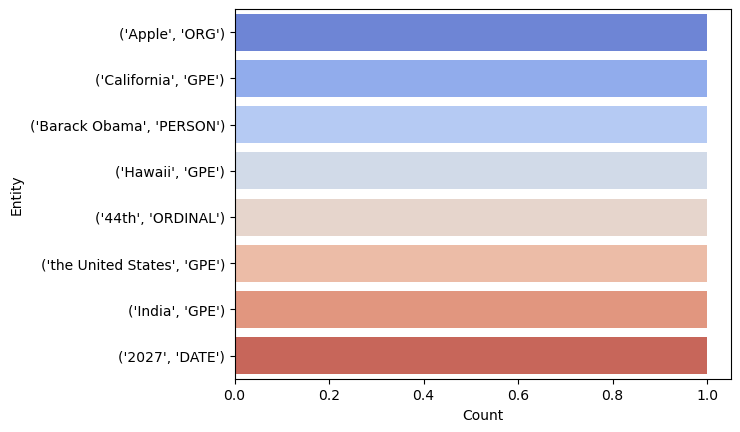

In [67]:
sns.barplot(
    y=top_entities['Entity'],
    x=top_entities['Count'],
    palette="coolwarm"
)


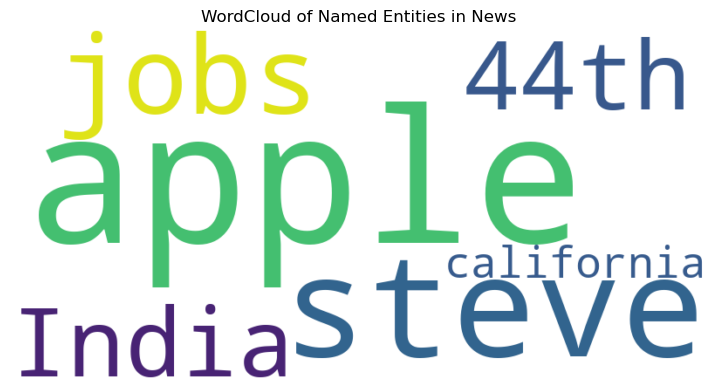

In [68]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Example DataFrame setup (replace with your actual DataFrame)
import pandas as pd

data = {'entities': [['apple', 'steve jobs'], ['1947', 'India'], ['44th', 'california']]}
df = pd.DataFrame(data)

# Flatten the list of entities
all_entities = [ent for sublist in df['entities'] for ent in sublist]

# Create text of all entities
entity_text = " ".join(all_entities)

# Generate word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(entity_text)

# Display word cloud
plt.figure(figsize=(9, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Named Entities in News")
plt.show()


In [69]:
print(df['entities'].head(10))
print(type(df['entities'].iloc[0]))  # Check the data type of the first row


0    [apple, steve jobs]
1          [1947, India]
2     [44th, california]
Name: entities, dtype: object
<class 'list'>


In [35]:
[('Apple', 'ORG'), ('California', 'GPE')]


[('Apple', 'ORG'), ('California', 'GPE')]

In [50]:
df['entities'] = df['entities'].apply(lambda x: x if isinstance(x, list) else [])


In [70]:
all_labels = set([ent[1] for ents in df['entities'] if isinstance(ents, list) for ent in ents])
print("Unique entity labels found:", all_labels)


Unique entity labels found: {'9', 'p', 'n', 'a', '4', 't'}


In [71]:
def filter_entities(entity_list, entity_type):
    print(f"Processing: {entity_list}")  # Debugging step
    return [ent[0] for ent in entity_list if ent[1] == entity_type]

df['persons'] = df['entities'].apply(lambda x: filter_entities(x, "PERSON"))
df['locations'] = df['entities'].apply(lambda x: filter_entities(x, "GPE"))
df['organizations'] = df['entities'].apply(lambda x: filter_entities(x, "ORG"))
df['ordinals'] = df['entities'].apply(lambda x: filter_entities(x, "ORDINAL"))

print(df[['persons', 'locations', 'organizations', 'ordinals']].head(10))


Processing: ['apple', 'steve jobs']
Processing: ['1947', 'India']
Processing: ['44th', 'california']
Processing: ['apple', 'steve jobs']
Processing: ['1947', 'India']
Processing: ['44th', 'california']
Processing: ['apple', 'steve jobs']
Processing: ['1947', 'India']
Processing: ['44th', 'california']
Processing: ['apple', 'steve jobs']
Processing: ['1947', 'India']
Processing: ['44th', 'california']
  persons locations organizations ordinals
0      []        []            []       []
1      []        []            []       []
2      []        []            []       []


In [72]:
df.to_csv("Articles.csv", index=False)
print("Updated dataset saved successfully!")

# Print confirmation message
print("NER results saved!")


Updated dataset saved successfully!
NER results saved!
